In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
# preparing data
from sklearn.decomposition import PCA
from methods import *
from models import *
import pandas as pd
import numpy as np
import torch
import math
import os
from os import path
import torch.nn as nn

model_name = "VAE"
DATASET = 'full_data'

"""___________________Hyper Parameters________________________"""
CROSS_VALIDATION_SHUFFLE = True
TRIM_DATA = False
FILTER_CORRCOEF = False
REMOVE_NOISE = False
REMOVE_NOISE_THRESHOLD = 5
DENOISE = False
NOISE_FACTOR = 0.05
NOISE_FRACTION = 0.8
NORMALIZE_DATA = True
LATENT_DIM = 2
HIDDEN_DIM = 32
WEIGHT_DECAY = 0
LEARNING_RATE = 1e-4
SIGMA = 1e0
EPOCHS = 8000
ACTIVATION = 'leaky_relu'
BATCH_SIZE = 1024
INITIALIZATION = 'xavier_normal'
"""___________________________________________________________"""
#device = torch.device("mps")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


if DATASET == 'network_data':
    raw_data = np.loadtxt('../data/network_flow_regular_data.csv', skiprows=1, delimiter=',')[:,:-1]
    anomalous_data = np.loadtxt('../data/network_flow_attack_data.csv', skiprows=1, delimiter=',')[:,:-1]
elif DATASET == 'medical_data':
    raw_data = np.loadtxt('../data/medical_regular_data.csv', skiprows=1, delimiter=',')[:,:-1]
    anomalous_data = np.loadtxt('../data/medical_attack_data.csv', skiprows=1, delimiter=',')[:,:-1]
    anomalous_data = np.loadtxt('../data/medical_attack_data_undetected.csv', skiprows=1, delimiter=',')[:,:-1]
elif DATASET == 'full_data':
    raw_data = np.concatenate((np.loadtxt('../data/network_flow_regular_data.csv', skiprows=1, delimiter=',')[:,:-1], np.loadtxt('../data/medical_regular_data.csv', skiprows=1, delimiter=',')[:,:-1]), axis=1)
    anomalous_data = np.concatenate((np.loadtxt('../data/network_flow_attack_data.csv', skiprows=1, delimiter=',')[:,:-1], np.loadtxt('../data/medical_attack_data.csv', skiprows=1, delimiter=',')[:,:-1]), axis=1)
elif DATASET == 'network_data1':
    raw_data = np.loadtxt('../data/network_flow1_regular_data.csv', skiprows=1, delimiter=',')[:,:-1]
    anomalous_data = np.loadtxt('../data/network_flow1_attack_data.csv', skiprows=1, delimiter=',')[:,:-1]
elif DATASET == 'medical_data1':
    raw_data = np.loadtxt('../data/medical_regular_data.csv', skiprows=1, delimiter=',')[:,:-1]
    raw_data = np.loadtxt('../data/medical1_regular_data.csv', skiprows=1, delimiter=',')[:,:-1]
    raw_data = np.concatenate((np.loadtxt('../data/medical_regular_data.csv', skiprows=1, delimiter=',')[:,:-1], np.loadtxt('../data/medical1_regular_data.csv', skiprows=1, delimiter=',')[:,:-1]), axis=0)
    anomalous_data = np.loadtxt('../data/medical_attack_data.csv', skiprows=1, delimiter=',')[:,:-1]
elif DATASET == 'full_data1':
    raw_data = np.concatenate((np.loadtxt('../data/network_flow1_regular_data.csv', skiprows=1, delimiter=',')[:,:-1], np.loadtxt('../data/medical1_regular_data.csv', skiprows=1, delimiter=',')[:,:-1]), axis=1)
    anomalous_data = np.concatenate((np.loadtxt('../data/network_flow1_attack_data.csv', skiprows=1, delimiter=',')[:,:-1], np.loadtxt('../data/medical1_attack_data.csv', skiprows=1, delimiter=',')[:,:-1]), axis=1)
elif DATASET == 'network_data2':
    raw_data = np.loadtxt('../data/network_flow2_regular_data.csv', skiprows=1, delimiter=',')[:,:-1]
    anomalous_data = np.loadtxt('../data/network_flow2_attack_data.csv', skiprows=1, delimiter=',')[:,:-1]
train_data, validation_data, test_data, anomalous_data = preProcessData_OneClass(raw_data, anomalous_data, trim=TRIM_DATA, trim_threshold=0.98, normalize=NORMALIZE_DATA,
            filterLinearDependencies=True, filter_threshold=0.98, removeNoise=REMOVE_NOISE, noise_threshold=REMOVE_NOISE_THRESHOLD)

train_data, validation_data, test_data, anomalous_data = toTorchTensor(device, train_data, validation_data, test_data, anomalous_data)
NUM_FEATURE = len(train_data[0])
print(train_data.shape)
print(torch.max(anomalous_data))


Train data shape after trim:  (8005, 7)
Train data shape after normalize:  (8005, 7)
Train data shape after filter corrcoef:  (8005, 7)
torch.Size([8005, 7])
tensor(1.)


In [3]:
criterion = nn.MSELoss(reduction='sum')
model = VAE(NUM_FEATURE, latent_dim=LATENT_DIM, hidden_dim=HIDDEN_DIM, activation=ACTIVATION, initialization=INITIALIZATION, sigma=SIGMA)

In [4]:
# train
loss_array = train(model, 'SGD', EPOCHS, train_data, train_data, criterion, batch_size=BATCH_SIZE, lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY
        ,grad_limit=1e3)
torch.save(model.state_dict(), '../model/param_VAE')

epoch : 1/8000, loss = 1.265252
epoch : 2/8000, loss = 0.313406
epoch : 3/8000, loss = 0.247379
epoch : 4/8000, loss = 0.224695
epoch : 5/8000, loss = 0.216199
epoch : 6/8000, loss = 0.212544
epoch : 7/8000, loss = 0.209719
epoch : 8/8000, loss = 0.208277
epoch : 9/8000, loss = 0.207742
epoch : 10/8000, loss = 0.207304
epoch : 11/8000, loss = 0.207017
epoch : 12/8000, loss = 0.206765
epoch : 13/8000, loss = 0.206568
epoch : 14/8000, loss = 0.206684
epoch : 15/8000, loss = 0.206381
epoch : 16/8000, loss = 0.206120
epoch : 17/8000, loss = 0.206150
epoch : 18/8000, loss = 0.206276
epoch : 19/8000, loss = 0.206287
epoch : 20/8000, loss = 0.206103
epoch : 21/8000, loss = 0.206086
epoch : 22/8000, loss = 0.205957
epoch : 23/8000, loss = 0.205910
epoch : 24/8000, loss = 0.205784
epoch : 25/8000, loss = 0.205593
epoch : 26/8000, loss = 0.205532
epoch : 27/8000, loss = 0.205817
epoch : 28/8000, loss = 0.205982
epoch : 29/8000, loss = 0.205505
epoch : 30/8000, loss = 0.205639
epoch : 31/8000, lo

In [5]:
#model.load_state_dict(torch.load('../model/param_AE'))
model.eval()
#batch = torch.mean(train_data, dim=0, keepdim=True).expand(train_data.shape)[:BATCH_SIZE,]
#code = torch.randn_like(torch.ones(len(batch), LATENT_DIM))
code = model.encoding_layer(train_data)
code_attack = model.encoding_layer(anomalous_data)
# simplified distribution generation
mu, var = model.generate_mean(code), torch.exp(model.generate_log_var(code))
mu_attack, var_attack = model.generate_mean(code_attack), torch.exp(model.generate_log_var(code_attack))
print(f'Z mean train: {torch.mean(mu, dim=0)}, \nZ sd train: {torch.mean(var, dim=0)}')

print(f'Z mean attack: {torch.mean(mu_attack, dim=0)}, \nZ sd attack: {torch.mean(var_attack, dim=0)}')
model(train_data)
print(f'Model train KLD = {model.KLD}',)
model(anomalous_data)
print(f'Model attack KLD = {model.KLD}',)
print(mu[:,0])
print(mu_attack[:,0])


Z mean train: tensor([2.5506e-05, 3.5841e-05], grad_fn=<MeanBackward1>), 
Z sd train: tensor([1.0000, 1.0000], grad_fn=<MeanBackward1>)
Z mean attack: tensor([4.0839e-05, 8.3988e-05], grad_fn=<MeanBackward1>), 
Z sd attack: tensor([1.0002, 1.0000], grad_fn=<MeanBackward1>)
Model train KLD = 0.016524167731404305
Model attack KLD = 0.004664228763431311
tensor([ 8.1073e-05,  9.3501e-05, -4.4886e-03,  ...,  9.3501e-05,
         8.1073e-05,  8.1073e-05], grad_fn=<SelectBackward0>)
tensor([-1.7510e-03, -1.6700e-03, -1.7199e-03,  ...,  9.3501e-05,
         9.3501e-05,  9.3501e-05], grad_fn=<SelectBackward0>)


In [6]:
# evaluation
#model.load_state_dict(torch.load('../model/param_AE'))
model.eval()
validation_batch_size = 1
lcs_array = torch.tensor([[0 for _ in range(NUM_FEATURE)]])

difference = torch.square(model(train_data) - train_data)
lcs_array = torch.div(difference, torch.sum(difference, 1, True).expand(difference.shape))
lcs_mean = torch.mean(lcs_array, 0, True)
l = len(validation_data)
permutation = np.random.permutation(l)
for i in range(0, l, validation_batch_size):
    batch_idc = permutation[i:i+validation_batch_size]
    batch = validation_data[batch_idc,]
    loss = 0
    # compute reconstructions
    outputs = model(batch)

    #print(f"input:{batch[0].data}\noutput:{outputs[0].data}")
    
    # compute the epoch validation loss
    loss = criterion(outputs, batch).item()
    loss /= len(batch)
    #i_loss = torch.sum(torch.square(batch[0]-outputs[0]))
    #print(f"Batch Average Reconstruciton Loss:{loss}")
    lcs = torch.sum((torch.square(outputs - batch) / len(batch)), 0, keepdim=False) / loss
    #print(f"Loss Contribution Score: {(lcs)}") 

lcs_array = lcs_array[1:].detach()
lcs_mean_val = torch.mean(lcs_array, dim=0)
print("Validation average lcs: ",lcs_mean_val.numpy())

print(f"Train average loss:{criterion(model(train_data), train_data) / len(train_data)}")

print(f"Validation average loss:{criterion(model(validation_data), validation_data) / len(validation_data)}")
print("Test average loss: ", criterion(model(test_data), test_data)/len(test_data))
print("Anomalous average loss: ", criterion(model(anomalous_data), anomalous_data)/len(anomalous_data))

Validation average lcs:  [0.01166445 0.01272232 0.3461653  0.49838707 0.03867183 0.04025583
 0.0521332 ]
Train average loss:0.20467597246170044
Validation average loss:0.20484313368797302
Test average loss:  tensor(0.2034, grad_fn=<DivBackward0>)
Anomalous average loss:  tensor(0.2128, grad_fn=<DivBackward0>)


In [7]:
# test
#model.load_state_dict(torch.load('../model/param_AE'))
model.eval()
model_name = "VAE"

# Collapse
if True:
    loss_test = []
    lcs_array_test = torch.tensor([[0 for _ in range(NUM_FEATURE)]])

    y_scores, y_scores_lcs = [], []
    kl_div_test, y_ground_truth, vae_kl_test = [], [], []
    # Define KL Loss
    kl_loss = nn.KLDivLoss(reduction="batchmean", log_target=False)
    l = len(test_data)
    permutation = np.random.permutation(l)
    for i in range(0, l, 1):
        batch_idc = permutation[i:i+1]
        batch = test_data[batch_idc,]
        loss = 0
        
        # compute reconstructions
        outputs = model(batch)

        #print(f"input:{batch[0].data}\noutput:{outputs[0].data}")
        
        # compute the epoch test loss
        loss = criterion(outputs, batch).item()
        vae_kl_test.append(model.KLD.item())
        # append loss and class label
        y_scores.append(loss)
        y_ground_truth.append(0)
        #i_loss = torch.sum(torch.square(batch[0]-outputs[0]))
        loss_test.append(loss)
        #print(f"Reconstruciton Loss:{loss}")
        
        #lcs = torch.sum((torch.square(outputs - batch)), 0, keepdim=False) / loss
        lcs = torch.square(outputs - batch) / loss
        #print(f"Loss Contribution Score: {(lcs)}")
        lcs = torch.reshape(lcs, (1, NUM_FEATURE))
        # KL Divergence
        this_kld = kl_loss(torch.log(lcs), lcs_mean.view(1, NUM_FEATURE)).detach().numpy()
        #print(this_kld)
        kl_div_test.append(this_kld)
        lcs_array_test = torch.cat((lcs_array_test, lcs), 0)

    lcs_array_test = lcs_array_test[1:].detach()
    lcs_mean_test = torch.mean(lcs_array_test, dim=0)
    print("Test average lcs: ", lcs_mean_test.numpy())
    # Loss Contribution Score
    y_scores_lcs = torch.sum((torch.square(lcs_array_test - lcs_mean)), dim=1, keepdim=False)
    lcs_array_test = lcs_array_test.numpy()

    path = "../result_lcs"
    filename = model_name +  "_lcs_normal.csv"
    pathfile = os.path.normpath(os.path.join(path, filename))
    file_present = os.path.isfile(pathfile)
    if not file_present:
        df = pd.DataFrame(lcs_array_test) #convert to a dataframe
        #df.to_csv(pathfile, index=True) #save to file
        print(f"Saved file to {pathfile}")
    else:
        i = 1
        while file_present:
            print("FILE PRESENT "+ str(i))
            filename = model_name + "_lcs_normal_" + str(i) + ".csv"
            pathfile = os.path.normpath(os.path.join(path, filename))
            file_present = os.path.isfile(pathfile)
            i += 1
        df = pd.DataFrame(lcs_array_test) #convert to a dataframe
        #df.to_csv(pathfile, index=True) #save to file
        print(f"Saved file to {pathfile}")

    #________________________________________________________________________#

    # anomaly detection test
    loss_attack =[]
    lcs_array_attack = torch.tensor([[0 for _ in range(NUM_FEATURE)]])
    kl_div_attack = []
    vae_kl_attack = []
    l = len(anomalous_data)
    permutation = np.random.permutation(l)
    for i in range(0, l, 1):
        batch_idc = permutation[i:i+1]
        batch = anomalous_data[batch_idc,]
        
        loss = 0
        # compute reconstructions
        outputs = model(batch)
        # compute the epoch test loss
        loss = criterion(outputs, batch).item()
        vae_kl_attack.append(model.KLD.item())
        # append loss and class label
        y_scores.append(loss)
        y_ground_truth.append(1)
        loss_attack.append(loss)
        #print(f"Reconstruciton Loss:{loss}")
        
        #lcs = torch.sum((torch.square(outputs - batch)), 0, keepdim=False) / loss
        lcs = torch.square(outputs - batch) / loss
        #print(f"Loss Contribution Score: {(lcs)}")
        # KL Divergence
        this_kld = kl_loss(torch.log(lcs), lcs_mean.view(1, NUM_FEATURE)).detach().numpy()
        #print(this_kld)
        kl_div_attack.append(this_kld)

        lcs_array_attack = torch.cat((lcs_array_attack, torch.reshape(lcs, (1, NUM_FEATURE))), 0)

    lcs_array_attack = lcs_array_attack[1:].detach()
    lcs_mean_attack = torch.mean(lcs_array_attack, dim=0)
    print("Anomalous average lcs: ", lcs_mean_attack.numpy())
    # Loss Contribution Score
    y_scores_lcs = torch.cat((y_scores_lcs, torch.sum((torch.square(lcs_array_attack - lcs_mean)), dim=1, keepdim=False))).detach().numpy()
    
    lcs_array_attack = lcs_array_attack.numpy()
    
    path = "../result_lcs"
    filename = model_name + "_lcs_attack.csv"
    pathfile = os.path.normpath(os.path.join(path, filename))
    file_present = os.path.isfile(pathfile) 
    if not file_present:
        df = pd.DataFrame(lcs_array_attack) #convert to a dataframe
        #df.to_csv(pathfile, index=True) #save to file
    else:
        i = 1
        while file_present:
            print("FILE PRESENT "+ str(i))
            filename = model_name + "_lcs_attack_" + str(i) + ".csv"
            pathfile = os.path.normpath(os.path.join(path, filename))
            file_present = os.path.isfile(pathfile)
            i += 1
        df = pd.DataFrame(lcs_array_attack) #convert to a dataframe
        #df.to_csv(pathfile, index=True) #save to file
        print(f"Saved file to {filename}")


Test average lcs:  [0.01255383 0.01197553 0.3475867  0.5024088  0.0367577  0.039385
 0.04933242]
Saved file to ../result_lcs/VAE_lcs_normal.csv
Anomalous average lcs:  [0.01376969 0.02026268 0.34420067 0.45105797 0.05356447 0.05006071
 0.06708382]


In [8]:
# use TSNE to show code distribution
PERPLEXITY = 10
if True:
    model.eval()
    full_code = model.encode(torch.cat((test_data, anomalous_data), dim=0)).detach().numpy()
    full_label = [0 for _ in range(len(test_data))] + [1 for _ in range(len(anomalous_data))]
    from sklearn.manifold import TSNE

    # We want to get TSNE embedding with 2 dimensions
    n_components = 2
    tsne = TSNE(n_components, perplexity=PERPLEXITY)
    #print(full_data.shape)
    tsne_code = tsne.fit_transform(full_code)
# use TSNE to show LCS 
if True:
    tsne = TSNE(n_components, perplexity=PERPLEXITY)
    full_lcs = np.concatenate((lcs_array_test, lcs_array_attack), axis=0)
    #print(full_data.shape)
    tsne_lcs = tsne.fit_transform(full_lcs)

NameError: name 'model_name' is not defined

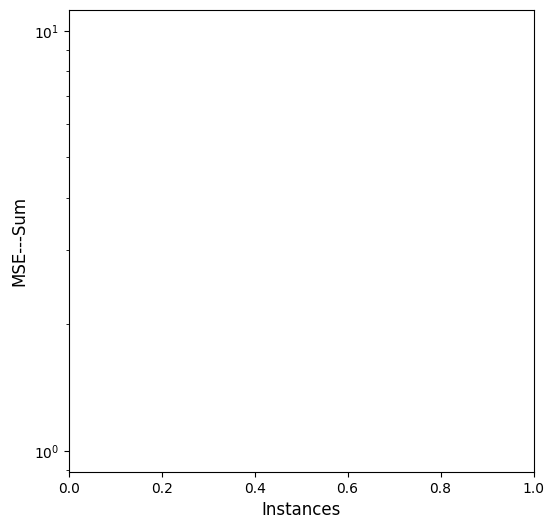

In [1]:
import matplotlib.pyplot as plt
if True:
    fig = plt.figure(figsize = (6,6))

    ax = fig.add_subplot(1,1,1)

    ax.set_xlabel('Instances', fontsize = 12)
    ax.set_ylabel('MSE---Sum', fontsize = 12)
    ax.set_yscale('log')
    #ax.set_ylim(1e2, 1e9)
    ax.set_title('Reconstruction Error: - ' + model_name, fontsize = 18)
    ax.grid()
    a = ax.scatter(np.arange(len(loss_test)), loss_test, marker=".")
    b = ax.scatter(np.arange(len(loss_attack)), loss_attack, marker="x", alpha=0.4)
    a.set_label('Normal data')
    b.set_label('Anomalous data')
    ax.legend()

    fig2 = plt.figure(figsize = (6,6))
    ax2 = fig2.add_subplot(1,1,1)
    ax2.set_title('KL DIV: - ' + model_name, fontsize = 18)
    ax2.scatter(np.arange(len(kl_div_test)), kl_div_test, marker=".").set_label('Normal data')
    ax2.scatter(np.arange(len(kl_div_attack)), kl_div_attack, marker=".", alpha=0.4).set_label('Anomalous data')
    #ax2.set_ylim(-0.1, 0.1)
    ax2.grid()
    ax2.legend()

    fig3 = plt.figure(figsize = (6,6))
    ax3 = fig3.add_subplot(1,1,1)
    l1, l2 = len(test_data), len(anomalous_data)
    ax3.scatter(tsne_code[:l1,0], tsne_code[:l1,1], marker=".").set_label('Normal data')
    ax3.scatter(tsne_code[l1:,0], tsne_code[l1:,1], marker="x", alpha=0.4).set_label('Anomalous data')
    ax3.set_title(('tSNE of codes (perplexity = ' + str(PERPLEXITY) + '): ' + model_name), fontsize = 18)
    ax3.set_xlabel('tSNE-1', fontsize = 12)
    ax3.set_ylabel('tSNE-2', fontsize = 12)
    ax3.legend()

    # Plot the result of TSNE
    fig4 = plt.figure(figsize = (6,6))
    ax4 = fig4.add_subplot(1,1,1
    #, projection='2d'
    )
    l1, l2 = len(test_data), len(anomalous_data)
    ax4.scatter(tsne_lcs[:l1,0], tsne_lcs[:l1,1], 
    #np.arange(l1), 
    marker=".").set_label('Normal data')
    ax4.scatter(tsne_lcs[l1:,0], tsne_lcs[l1:,1], 
    #np.arange(l2), 
    marker="x", alpha=0.4).set_label('Anomalous data')
    ax4.set_title(('tSNE of lcs (perplexity = ' + str(PERPLEXITY) + '): ' + model_name), fontsize = 18)
    ax4.set_xlabel('tSNE-1', fontsize = 12)
    ax4.set_ylabel('tSNE-2', fontsize = 12)
    ax4.legend()
    
    # plot model kld
    fig5 = plt.figure(figsize = (6,6))
    ax5 = fig5.add_subplot(1,1,1)
    ax5.set_title('Model KLD: - ' + model_name, fontsize = 18)
    ax5.scatter(np.arange(len(kl_div_test)), vae_kl_test, marker=".").set_label('Normal data')
    ax5.scatter(np.arange(len(kl_div_attack)), vae_kl_attack, marker=".", alpha=0.4).set_label('Anomalous data')
    #ax5.set_ylim(-0.1, 0.1)
    ax5.grid()
    ax5.legend()

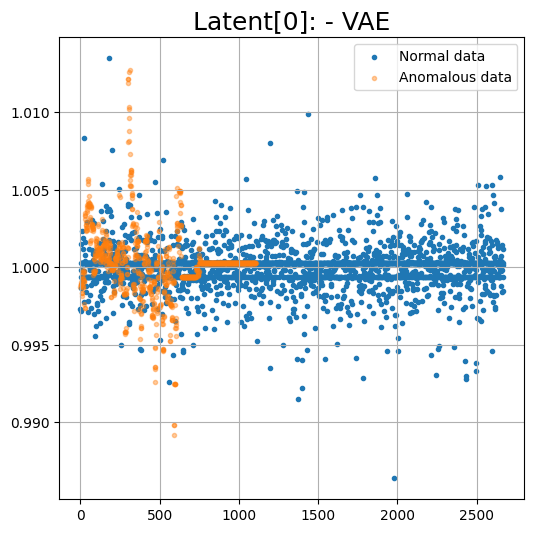

In [10]:
# plot codes
code_test = model.encoding_layer(test_data)
code_attack = model.encoding_layer(anomalous_data)
mu_test, var_test = model.generate_mean(code_test), torch.exp(model.generate_log_var(code_test))
mu_attack, var_attack = model.generate_mean(code_attack), torch.exp(model.generate_log_var(code_attack))

i, MEAN = 0, False

fig6 = plt.figure(figsize = (6,6))
ax6 = fig6.add_subplot(1,1,1)
ax6.set_title('Latent[0]: - ' + model_name, fontsize = 18)
if MEAN:
    ax6.scatter(np.arange(len(mu_test)), mu_test[:,i].detach().numpy(), marker=".").set_label('Normal data')
    ax6.scatter(np.arange(len(mu_attack)), mu_attack[:,i].detach().numpy(), marker=".", alpha=0.4).set_label('Anomalous data')
else:
    ax6.scatter(np.arange(len(mu_test)), var_test[:,i].detach().numpy(), marker=".").set_label('Normal data')
    ax6.scatter(np.arange(len(mu_attack)), var_attack[:,i].detach().numpy(), marker=".", alpha=0.4).set_label('Anomalous data')
#ax6.set_ylim(-0.1, 0.1)
ax6.grid()
ax6.legend()

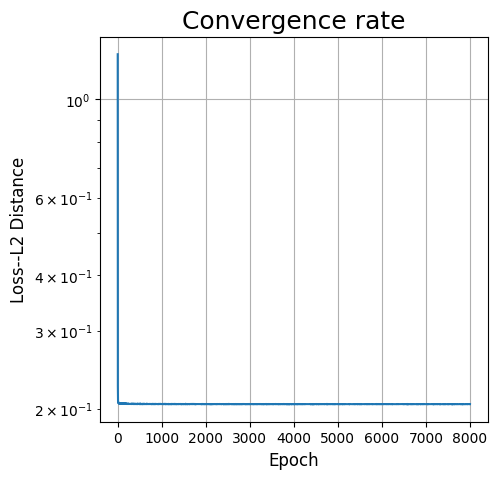

In [11]:
# Convergence Rate
if True:
    fig = plt.figure(figsize = (5, 5))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Epoch', fontsize = 12)
    ax.set_ylabel('Loss--L2 Distance', fontsize = 12)
    ax.set_yscale('log')
    #ax.set_ylim(1e5, 1e9)
    ax.set_title('Convergence rate', fontsize = 18)
    ax.grid()
    a = ax.plot(loss_array)

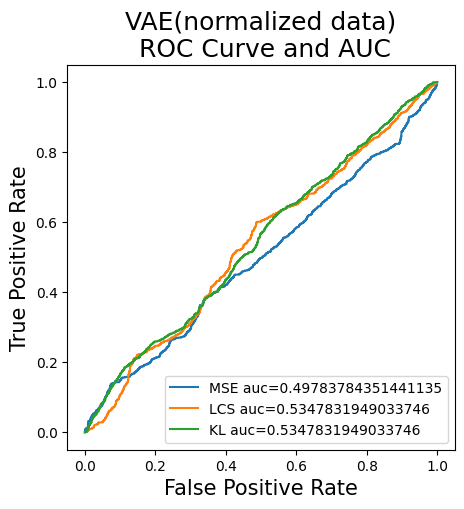

In [12]:
# ROC & AUC
from sklearn import metrics
if True:
    fig = plt.figure(figsize = (5,5))
    ax = fig.add_subplot(1,1,1) 

    fpr_MSE, tpr_MSE, _ = metrics.roc_curve(y_ground_truth,  y_scores)
    auc_MSE = metrics.roc_auc_score(y_ground_truth,  y_scores)
    fpr_LCS, tpr_LCS, _ = metrics.roc_curve(y_ground_truth,  y_scores_lcs)
    auc_LCS = metrics.roc_auc_score(y_ground_truth,  y_scores_lcs)

    y_scores_kl = kl_div_test + kl_div_attack
    fpr_KL, tpr_KL, _ = metrics.roc_curve(y_ground_truth,  y_scores_kl)
    auc_KL = metrics.roc_auc_score(y_ground_truth,  y_scores_kl)


    ax.set_title(model_name+'(normalized data)\n ROC Curve and AUC', fontsize = 18)
    ax.plot(fpr_MSE,tpr_MSE, label="MSE auc="+str(auc_MSE))
    ax.plot(fpr_LCS,tpr_LCS, label="LCS auc="+str(auc_LCS))
    ax.plot(fpr_KL,tpr_KL, label="KL auc="+str(auc_LCS))
    ax.set_xlabel("False Positive Rate", fontsize=15)
    ax.set_ylabel("True Positive Rate", fontsize=15)
    ax.legend(loc=4)

In [13]:
# test block
import torch.nn.functional as F
kl_loss = nn.KLDivLoss(reduction="batchmean")
# input should be a distribution in the log space
input = F.log_softmax(torch.randn(3, 5, requires_grad=True), dim=1)
# Sample a batch of distributions. Usually this would come from the dataset
target = F.softmax(torch.rand(3, 5), dim=1)
output = kl_loss(input, target)
print(input)
print(target)

kl_loss = nn.KLDivLoss(reduction="batchmean", log_target=True)
log_target = F.log_softmax(torch.rand(3, 5), dim=1)
output = kl_loss(input, log_target)
l = np.random.permutation(10)
for i in range(0, 10, 3):
    print(l[i:i+3])

tensor([[-0.8419, -1.2433, -3.0665, -1.6717, -3.0760],
        [-2.5971, -1.6122, -1.0099, -2.5137, -1.2700],
        [-3.2559, -1.4127, -1.4434, -0.8241, -3.1410]],
       grad_fn=<LogSoftmaxBackward0>)
tensor([[0.1595, 0.2362, 0.2063, 0.1113, 0.2866],
        [0.1664, 0.2311, 0.2257, 0.2278, 0.1490],
        [0.1513, 0.1790, 0.2320, 0.2397, 0.1981]])
[2 9 1]
[5 0 7]
[4 6 3]
[8]
